### import the requires libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### read the data into a variable and assign the 1st row to the column headings
#### view the first few rows
#### check out statistics for numeric columns
#### have a look at the column names

In [2]:
flags = pd.read_csv("flags.csv")
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


### The landmass values are:  
    1 = North America  
    2 = South America  
    3 = Europe  
    4 = Africa  
    4 = Asia ( I think it should be 5 though)  
    6 = Oceania  

In [3]:
flags.describe()

,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,Red,...,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

### assign Landmass column to a variable since that is the resulting column we are predicting 

In [5]:
labels = flags[['Landmass']]

### we will use the colors of the flag to predict the landmass hence they are assigned to a variable.

In [6]:
data = flags[["Red","Green","Blue","Gold","White","Black","Orange"]]

### split the data into training and test groups 

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

### create a decision tree classifier and fit with the train data

In [8]:
model = DecisionTreeClassifier(random_state=1)
model.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

### score the accuracy of the model using the test data

In [9]:
score = model.score(test_data, test_labels)
print(score)

0.3469387755102041


#### our model is accurate 34% of the time which isn't too good

### run the model with max_depth values from 1-20 
#### max_depth 
#### store the score for each depth in a list 

In [10]:
scores = []
for i in range(1,20):
    model = DecisionTreeClassifier(random_state=10,max_depth=i)
    model.fit(train_data, train_labels)
    score = model.score(test_data, test_labels)
    scores.append(score)

scores

[0.3469387755102041,
 0.22448979591836735,
 0.3469387755102041,
 0.32653061224489793,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041]

### let's display the score as a graph
#### with the exception when x=2, the scores are almost similar no matter the depth

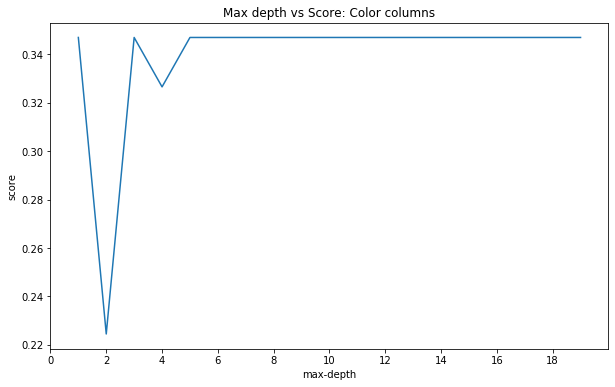

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), scores)

plt.xlabel('max-depth')
plt.ylabel('score')
plt.title('Max depth vs Score: Color columns')

plt.xlim(0,20)
plt.xticks(np.arange(0, 20, step=2))
plt.show()

### let us update the columns used to build the model to see if the score will improve
#### would be using columns that represent colors and shape of the flags

In [12]:
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange","Circles",
              "Crosses","Saltires","Quarters","Sunstars","Crescent","Triangle"]]
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

scores = []
for i in range(1,20):
    model = DecisionTreeClassifier(random_state=1, max_depth=i)
    model.fit(train_data, train_labels)
    score = model.score(test_data, test_labels)
    scores.append(score)
    
scores

[0.3469387755102041,
 0.3877551020408163,
 0.5102040816326531,
 0.5510204081632653,
 0.5510204081632653,
 0.5102040816326531,
 0.42857142857142855,
 0.4489795918367347,
 0.4489795918367347,
 0.4489795918367347,
 0.4489795918367347,
 0.4489795918367347,
 0.4489795918367347,
 0.4489795918367347,
 0.4489795918367347,
 0.4489795918367347,
 0.4489795918367347,
 0.4489795918367347,
 0.4489795918367347]

### plot the scores for the updated model
#### now we can see an improvement in our score's accuracy, we can be 55% accurate with a depth of 4 and 5
#### our score when x=1 is better when we used only the columns that describe the flag's color 

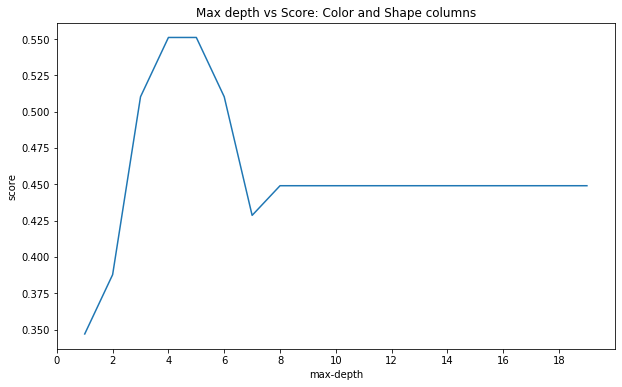

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), scores)

plt.xlabel('max-depth')
plt.ylabel('score')
plt.title('Max depth vs Score: Color and Shape columns')

plt.xlim(0,20)
plt.xticks(np.arange(0, 20, step=2))
plt.show()